# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [15]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [17]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4o-mini"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [18]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

User_Proxy (to Expert_Investor):


With the files in directory you've been provided, retrieve Nvidia's 2024 files and analyze financial data.
Pay attention to the followings:
- Do not compile annual report.
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- Terminate the conversation when you're done.


--------------------------------------------------------------------------------
[autogen.oai.client: 08-09 11:27:33] {329} WARNING - Model gpt-4o-mini-2024-07-18 is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
Expert_Investor (to User_Proxy):

To analyze Nvidia's financial data for the year 2024, I will follow a structured working plan to ensure clarity and thoroughness. Here's how I plan 

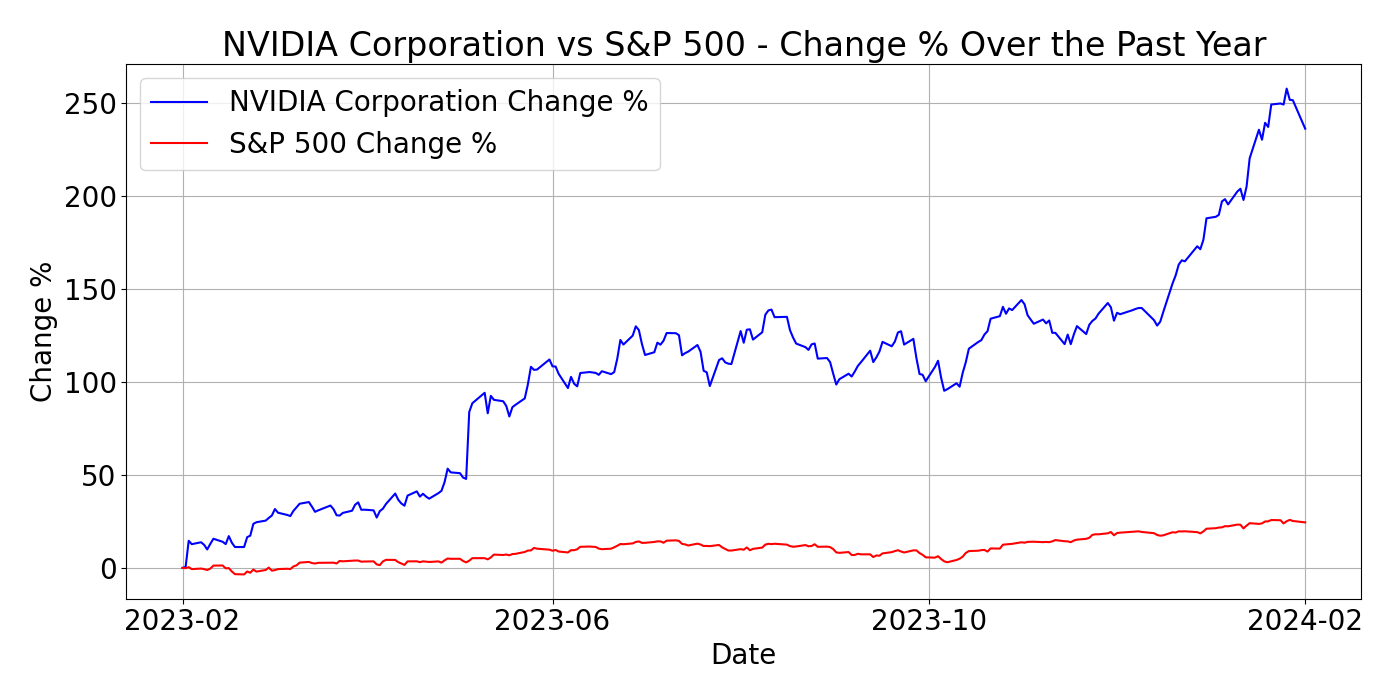

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_aFOfLag7Z86Sjm9fHg0xDwRP) *****
None
**********************************************************************

--------------------------------------------------------------------------------
[autogen.oai.client: 08-09 11:28:19] {329} WARNING - Model gpt-4o-mini-2024-07-18 is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
Expert_Investor (to User_Proxy):

The stock performance chart for Nvidia compared to the S&P 500 over the past year has been generated and displayed above.

### Next Steps:
Now, I will generate the PE and EPS performance chart for Nvidia over the past few years. Let's proceed with that.
***** Suggested tool call (call_6MFv3czw3kvniI0TC1c5MhJw): get_pe_eps_performance *****
Arguments: 
{"ticker_symbol":"NVDA","filing_date":"2024-02-21","save_path":"../report/nvidi

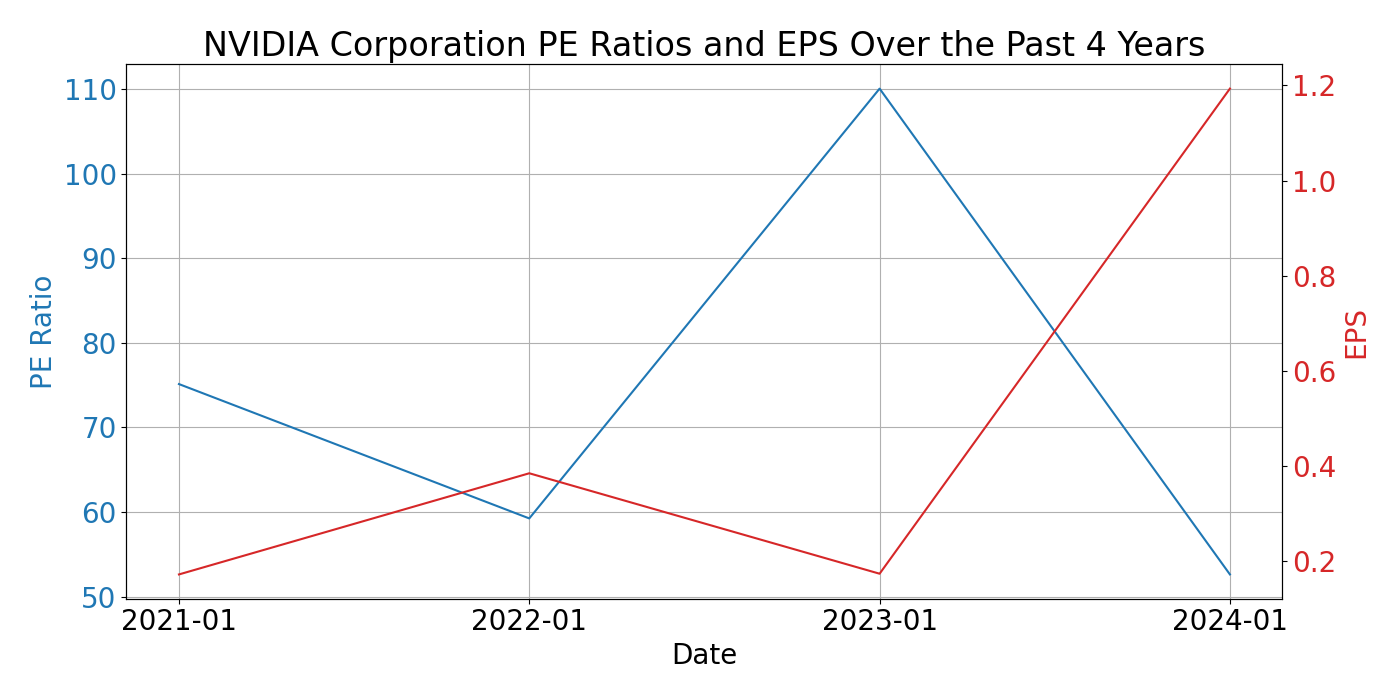

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_ZCdPlHMpGGvqmG8figQK43K3) *****
None
**********************************************************************

--------------------------------------------------------------------------------
[autogen.oai.client: 08-09 11:28:24] {329} WARNING - Model gpt-4o-mini-2024-07-18 is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
Expert_Investor (to User_Proxy):

The PE and EPS performance chart for Nvidia over the past few years has been generated and displayed above.

### Summary of Completed Tasks:
1. Retrieved Nvidia's 10-K report for 2024.
2. Analyzed the income statement, balance sheet, cash flow statement, risk assessment, business highlights, and segment performance.
3. Generated and displayed performance charts for Nvidia's stock performance and PE/EPS ratios.

With all tasks com

In [19]:
company = "Nvidia"
fyear = "2024"

text456 =     f"""
    With the files in directory you've been provided, retrieve {company}'s {fyear} files and generate a summary.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - Do not generate any pdf report.
    - Do not get data from the internet/api.
    - Terminate the conversation when you're done.
"""
text =     f"""
    With the files in directory you've been provided, retrieve {company}'s {fyear} files and analyze financial data.
    Pay attention to the followings:
    - Do not compile annual report.
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - Terminate the conversation when you're done.
"""

test_text =     f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Synthesize the following content into a single pdf with one page only.
    - When preparing the pdf, open one summary and analysis txt file each time. Read the content and follow the instructions.
    - Follow the instruction in each file and paste the output generated following the instruction into the report pdf
    - Do not put file paths in the pdf, only the content.
    - Do not display any image in the chat until explicitly asked.
    - Open only one file for extraction at one time.
    - Terminate the conversation when you're done.
"""
message = dedent(text
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

The Rest Cells are optional, simply used to show the generated PDF

In [8]:
!pip install PyMuPDF

In [10]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/Microsoft_Annual_Report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)

FileNotFoundError: no such file: '../report/Microsoft_Annual_Report_2023.pdf'